In [1]:
import mockmodel as p
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *


# Read the data
#
d     = readData()  # read from all output files? idk
rr,tt = np.meshgrid(d.grid.x,d.grid.y,indexing='ij')
zzr   = np.pi/2-tt


rhod  = d.rhodust[:,:,0,0]
temp  = d.dusttemp[:,:,0,0]

ModuleNotFoundError: No module named 'mockmodel'

In [ ]:
# Inspect the array informations in variable
#dtbg_mid, dtbg_sur, dtsm_mid, dtsm_sur all has size(100,200) and only have 0 value seems like
# zzr,rr,tt have size (100,32)

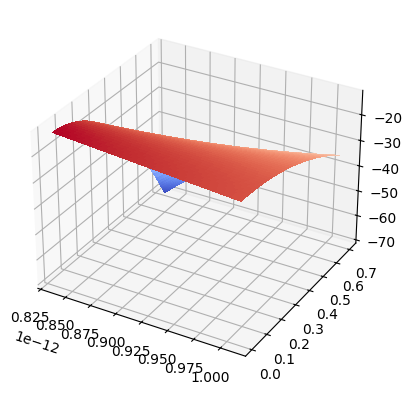

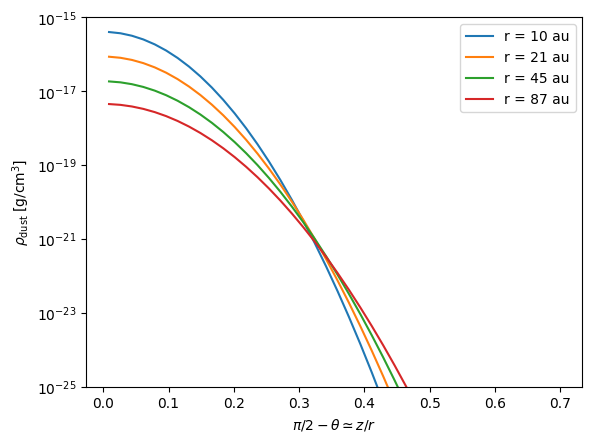

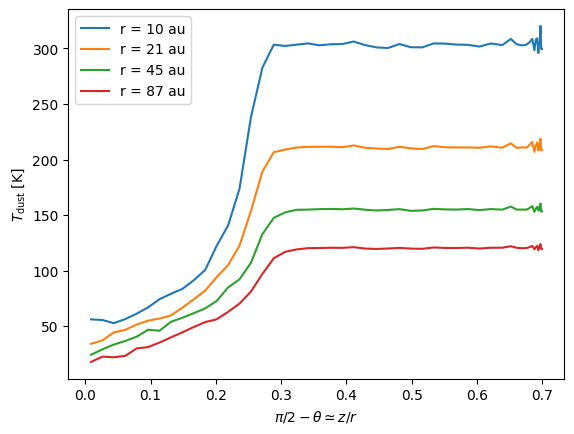

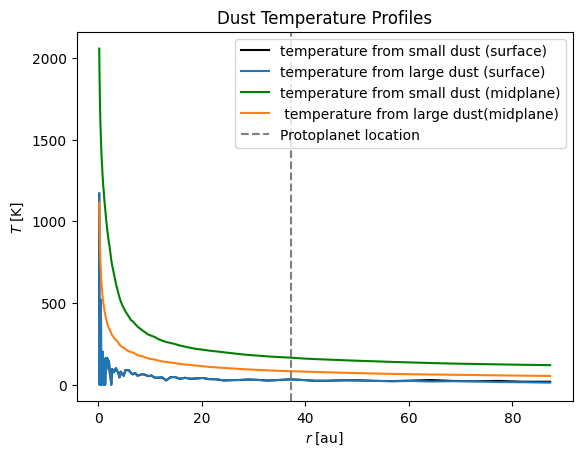

C:\Users\LHEM\AppData\Local\Temp\ipykernel_6184\3378162026.py:63: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), ':', label='temperature from small dust (surface)', color='black')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_6184\3378162026.py:64: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), ':', label='temperature from large dust (surface)', color='C0')


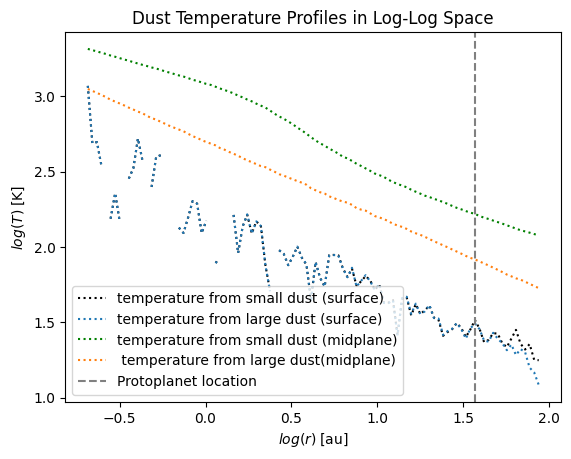

In [ ]:


#
# View a surface plot of the density structure
#
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rr)/au, zzr, np.log10(rhod), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)

#
# Set the radii where to make the following plots
#
rpl = np.array([10,21,44,90])*au   # Radii where to make the plots
irr = np.array(np.interp(rpl,d.grid.x,np.arange(len(d.grid.x)))+0.5,dtype=int)  # Nearest radial grid point

#
# Plot the vertical density structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.semilogy(zzr[ir,:],rhod[ir,:],label=rstr)
plt.ylim((1e-25,1e-15))
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$\rho_{\mathrm{dust}}\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.legend()

#
# Plot the vertical temperature structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.plot(zzr[ir,:],temp[ir,:],label=rstr)
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$T_{\mathrm{dust}}\;[\mathrm{K}]$')
plt.legend()

#
# Plot the radial midplane and surface temperature,
# and compare to the analytic estimate
#
plt.figure()
plt.title('Dust Temperature Profiles')
plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0,0], '-', label='temperature from small dust (surface)', color='black')
plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0,1], '-', label='temperature from large dust (surface)', color='C0')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,0], label='temperature from small dust (midplane)', color='green')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,1], label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=37.2, color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$r\;[\mathrm{au}]$')
plt.ylabel(r'$T\;[\mathrm{K}]$')
plt.legend()

plt.show()

# An issue: super confused with which one is mid plane, which one is surface 
plt.figure()
plt.title('Dust Temperature Profiles in Log-Log Space')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), ':', label='temperature from small dust (surface)', color='black')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), ':', label='temperature from large dust (surface)', color='C0')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,0]),':', label='temperature from small dust (midplane)', color='green')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,1]),':', label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=np.log10(37.2), color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$log(r)\;[\mathrm{au}]$')
plt.ylabel(r'$log(T)\;[\mathrm{K}]$')
plt.legend()

plt.show()


In [2]:
print(np.min(d.dusttemp[:, -1, 0, 0]))

NameError: name 'np' is not defined

In [3]:
# Subplots of T in different theta layers
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 0]), color='black')
axs[0, 0].set_title('d.dusttemp[:, -1, 0, 0], small dust,midplane')
axs[0, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 1]), color='C0')
axs[0, 1].set_title('d.dusttemp[:, -1, 0, 1], large dust, midplane')
axs[0, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

axs[1, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0, 0]), color='green')
axs[1, 0].set_title('d.dusttemp[:, 0, 0, 0], small dust, surface')
axs[1, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[1, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0, 1]), color='C1')
axs[1, 1].set_title('d.dusttemp[:, 0, 0, 1], large dust, surface')
axs[1, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'plt' is not defined

In [4]:
# How temperature changes with z for a given drop r
#I thi
print(d.dusttemp[20, :, 0,0])

NameError: name 'd' is not defined

In [5]:
#2D plot of the temperature

dtsm_sur = d.dusttemp[:, -1, :,0] # surface rom the small dust specdies
dtsm_mid = d.dusttemp[:, 0, :,0] # surface rom the small dust specdies
dtbg_sur = d.dusttemp[:, -1, :,1] # surface rom the large dust specdies
dtbg_mid = d.dusttemp[:, 0, :,1] # surface rom the large dust specdies


# Create 2D grids for r and phi
r_grid, phi_grid = np.meshgrid(d.grid.x, d.grid.z, indexing='ij')

# Convert polar coordinates (r, phi) to Cartesian coordinates (x, y)
x = r_grid * np.cos(phi_grid)
y = r_grid * np.sin(phi_grid)
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of y is {np.shape(y)}')



plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of MidPlane Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Midplane Temperature from Large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

NameError: name 'd' is not defined

In [6]:
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
import numpy as np
import math
import os

from radmc3dPy.analyze import *  
from radmc3dPy.natconst import * 

#
# First set up the model with
#
#   python problem_setup.py
#
# Then make sure to have run
#
#   radmc3d mctherm
#
#os.system('radmc3d mctherm')
#
# to compute the dust temperature before you run this plotting session.
#
# Now plot the temperature profile
#
a    = readData()
r    = a.grid.x[:]
temp = a.dusttemp[:,15,0,0]  #r,theta, phi, last one is pick the first dust species
# shape should be cosistent for different layers
plt.figure()
plt.plot(r/au,temp,'.')
plt.xlabel('r [au]')
plt.ylabel('T [K]')
plt.title('Midplane dust temperature')
plt.show()

#
a    = readData()
r    = a.grid.x[:]
rhodsm = a.rhodust[:,-1,0,0]  #r,theta, phi, last one is pick the zeroth orfirst dust species
rhodbg = a.rhodust[:,-1,0,1]
# shape should be cosistent for different layers
plt.figure()
plt.plot(np.log10(r/au),np.log10(rhodsm),'.')
plt.plot(np.log10(r/au),np.log10(rhodbg),'.')
plt.xlabel('1og10(r) [au]')
plt.ylabel('1og10(rhod) [g/cm^3]')
plt.title('Midplane density')
plt.show()


plt.figure()
plt.plot(r/au,rhodsm,'.')
plt.plot(r/au,rhodbg,'.')
plt.xlabel('1og10(r) [au]')
plt.ylabel('1og10(rhod) [g/cm^3]')
plt.title('Midplane density')
plt.show()


Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.


C:\Users\LHEM\radmc3d-2.0-master\radmc3d-2.0-master\python\radmc3dPy\radmc3dPy\analyze.py:640: SyntaxWarning: invalid escape sequence '\D'
  xtitle = '$\Delta v [\mathrm{km/s}]$'
C:\Users\LHEM\radmc3d-2.0-master\radmc3d-2.0-master\python\radmc3dPy\radmc3dPy\analyze.py:1517: SyntaxWarning: invalid escape sequence '\p'
  ylabel = '$\phi$ ' + angunit_label
C:\Users\LHEM\radmc3d-2.0-master\radmc3d-2.0-master\python\radmc3dPy\radmc3dPy\analyze.py:1528: SyntaxWarning: invalid escape sequence '\p'
  xlabel = '$\phi$ ' + angunit_label
C:\Users\LHEM\radmc3d-2.0-master\radmc3d-2.0-master\python\radmc3dPy\radmc3dPy\analyze.py:1566: SyntaxWarning: invalid escape sequence '\p'
  ylabel = '$\phi$ ' + angunit_label
C:\Users\LHEM\radmc3d-2.0-master\radmc3d-2.0-master\python\radmc3dPy\radmc3dPy\analyze.py:1577: SyntaxWarning: invalid escape sequence '\p'
  xlabel = '$\phi$ ' + angunit_label


FileNotFoundError: [Errno 2] No such file or directory: 'amr_grid.inp'

In [7]:
# Read to FITS information

from astropy.io import fits
from astropy.table import Table

# Path to the FITS file
fits_file_path = 'CPD_PPD_PDS70.fits'

# Open the FITS file and read the header
with fits.open(fits_file_path) as hdul:
    # Access the primary HDU (Header/Data Unit)
    primary_hdu = hdul[0]
    
    # Get the header
    header = primary_hdu.header

# Convert the header to a table
header_items = list(header.items())
header_table = Table(rows=header_items, names=['Keyword', 'Value'])

# Print the table
print(header_table)

FileNotFoundError: [Errno 2] No such file or directory: 'CPD_PPD_PDS70.fits'

# Plot opacity

Reading dustkappa_0.1_micron.inp
Reading dustkappa_100_micron.inp


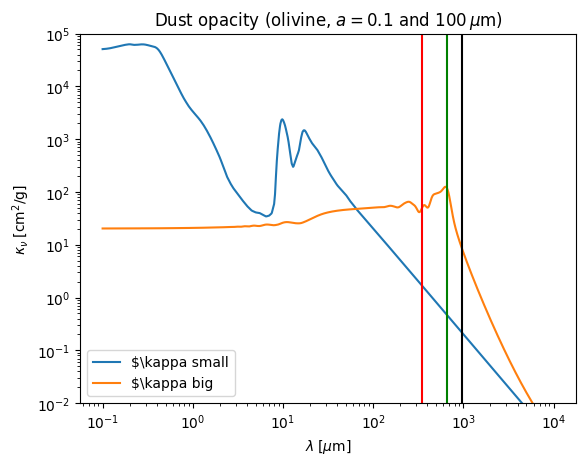

In [25]:

#
# Plot the opacity table
#
#
o1    = readOpac(ext='0.1_micron')
o2    = readOpac(ext='100_micron')
plt.figure()
#plt.loglog(o1.wav[0],o1.kabs[0],label=r'$\kappa_\nu^{\mathrm{abs}}$ (absorption) small',color='C0')
#plt.loglog(o1.wav[0],o1.ksca[0],':',label=r'$\kappa_\nu^{\mathrm{scat}}$ (scattering) small',color='C0')
plt.loglog(o1.wav[0],o1.kabs[0]+ o1.ksca[0],label=r'$\kappa small',color='C0')
plt.loglog(o2.wav[0],o2.kabs[0]+ o2.ksca[0],label=r'$\kappa big',color='C1')
#plt.loglog(o1.wav[0],o1.ksca[0],':',label=r'$\kappa_\nu^{\mathrm{scat}}$ (scattering) small',color='C0')
#plt.loglog(o2.wav[0],o2.kabs[0],label=r'$\kappa_\nu^{\mathrm{abs}}$ (absorption) big',color='C1')
#plt.loglog(o2.wav[0],o2.ksca[0],':',label=r'$\kappa_\nu^{\mathrm{scat}}$ (scattering) big',color='C1')
plt.ylim((1e-2,1e5))
plt.xlabel(r'$\lambda\;[\mu\mathrm{m}]$')
plt.ylabel(r'$\kappa_\nu\;[\mathrm{cm}^2/\mathrm{g}]$')
plt.title(r'Dust opacity (olivine, $a=0.1$ and $100\,\mu\mathrm{m}$)')
plt.axvline(x=345, color = 'red')
plt.axvline(x=652, color='green')
plt.axvline(x=970, color='black')   
plt.legend()

# need calculate optical depth through the CPD？

In [ ]:
# Plot the optical depth
# adapted from plot_structure.py in the radmc3d github of run_ppdisk_fargo3d_1_axisymm


sig_d   = []  # store the dust surface densities
opacs   = []  # stores opacity for different dust species

# I have dustopac.inp and dustkappa.inp, don't have dustkapscatmat.inp
# I HAVE scattering opacity, but treated in just the Henyey-Greenstein non-polarized way, not the more realistic 

# I dont think I can do the polarization I need to change the dustkapp to dustscatkappa
with open('dustopac.inp','r') as f:   
    str=f.readline()
    str=f.readline()
    str=f.readline()
    for i in range(a.rhodust.shape[-1]):
        a.getSigmaDust(i)
        sig_d.append(a.sigmadust)   # reads the surface density of the dust species
        str=f.readline()
        str=f.readline()
        str=f.readline()
        ext=str.split()[0]
        o=readOpac(ext=ext,scatmat=False)  # I dont see this .ext entension
        opacs.append(o)
        str=f.readline()
        
values = [7500, 3000, 2000, 1621.62, 1304.35, 869.57, 652.17, 461.54, 344.83]

# Convert to a NumPy array
values_array = np.array(values)
taus    = []
for lam in values_array:
    kappas = []
    for o in opacs:
        kap = np.interp(lam,o.wav[0],o.kabs[0]+o.ksca[0]) # for each awvelength,interpolate the absorption and scattering opacity
        kappas.append(kap)
    tau = np.zeros((len(opacs),a.grid.nx,a.grid.nz))  # initialise the tau (optical depth array)
    for i,s in zip(np.arange(len(sig_d)),sig_d):
        tau[i,:,:] = s*kappas[i]   # tao is the product of surface density and opacity # stacked vertcial already
    taus.append(tau)


# Is kappa per mass of per volume?
# Write the formula for this 
# gcm^-2 (sigmad) * cm^2g^-1 (kappa)?



Reading dustkappa_0.1_micron.inp
Reading dustkappa_100_micron.inp


In [20]:
print(np.shape(a.rhodust))
print(a.rhodust.shape[-1])
print(np.shape(taus))
print(a.grid.nz)

(100, 92, 200, 2)
2
(9, 2, 100, 200)
200


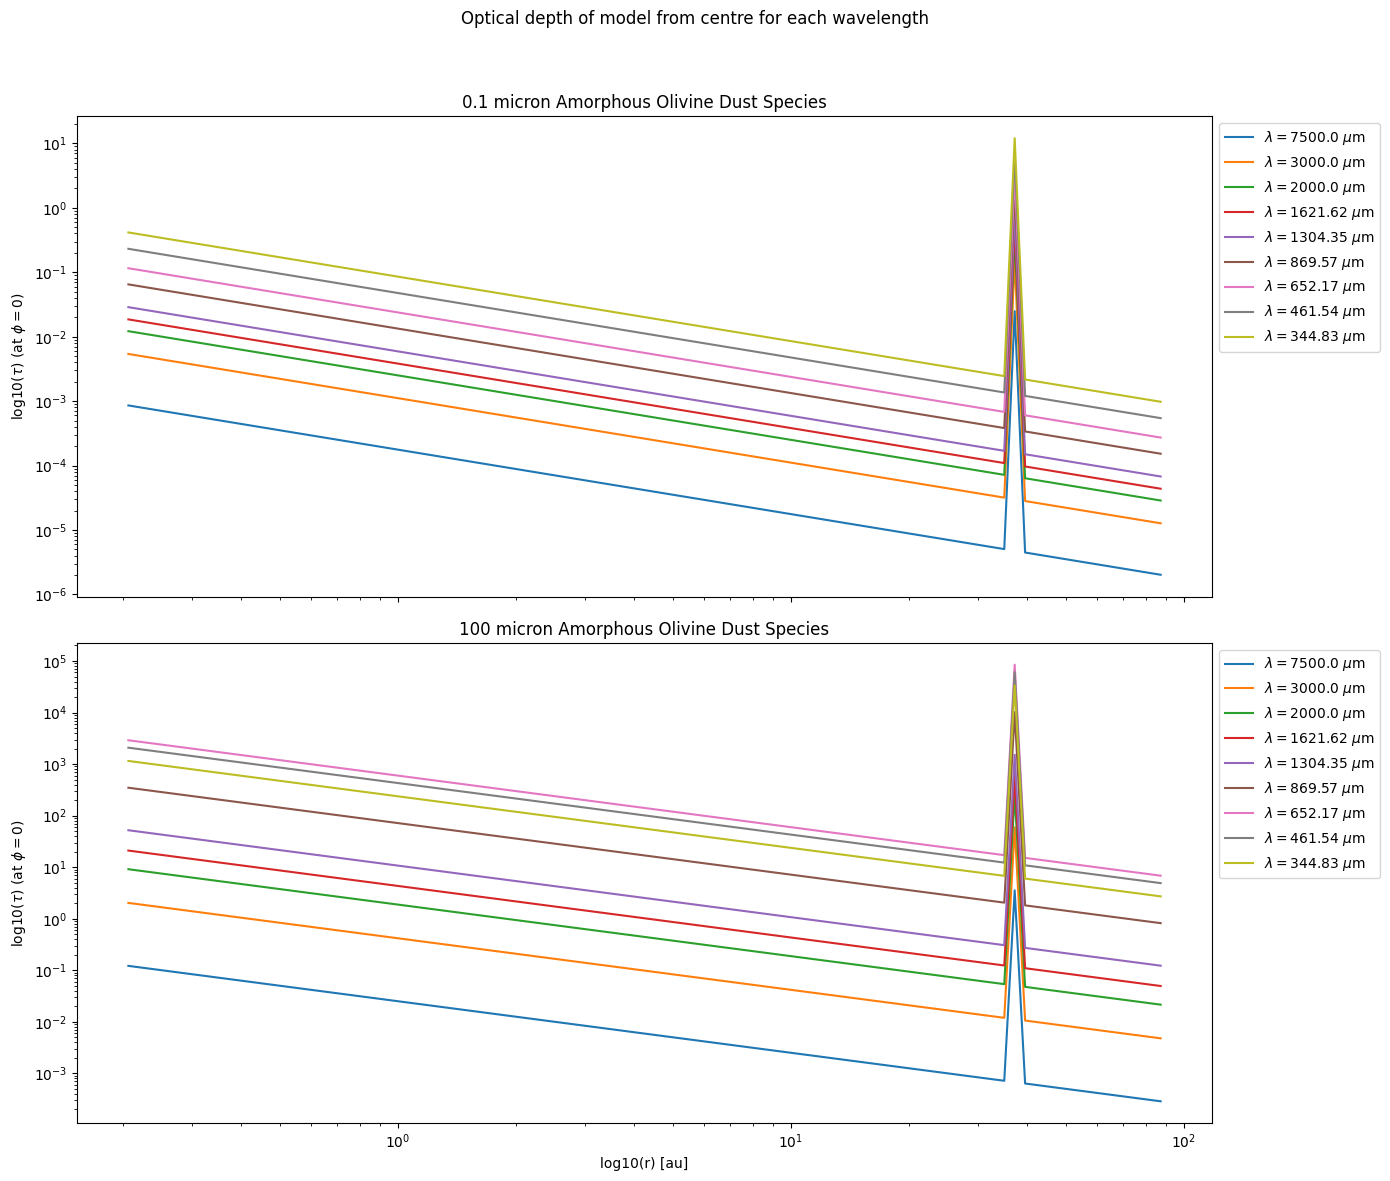

In [26]:

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)  # Two subplots (1 row, 2 columns)

fig.suptitle('Optical depth of model from centre for each wavelength')
sizelabel = ['0.1 micron','100 micron']
for i in range(len(opacs)):  # Iterate over species
    ax = axes[i]  
    for lam, tau in zip(values_array, taus):
        ax.loglog(a.grid.x / au, tau[i][:, 0],  # phi is 0
                  label=r'$\lambda={}$'.format(lam) + r' $\mu\mathrm{m}$')
    if i ==  1:
        ax.set_xlabel('log10(r) [au]')
    ax.set_ylabel(r'log10($\tau$) (at $\phi=0$)')  # Only label y-axis for the first subplot
    ax.set_title(f'{sizelabel[i]} Amorphous Olivine Dust Species')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [28]:
phi_max = np.arctan(1/37.2) # Azimuthal range of the CPD region
phi_min = 2*np.pi - phi_max

print(phi_max, phi_min)

0.02687524808475684 6.2563100590948295
